# Random Forest Project 

Exploring publicly available data from www.lendingclub.com. Creating a model that will predict if a borrower (people in need of money) will pay back the load to the investors.

Lending data from 2007-2010 https://www.lendingclub.com/info/download-data.action

A summary of the columns in the dataset:
* **credit.policy**: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* **purpose**: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* **int.rate**: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* **installment**: The monthly installments owed by the borrower if the loan is funded.
* **log.annual.inc**: The natural log of the self-reported annual income of the borrower.
* **dti**: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* **fico**: The FICO credit score of the borrower.
* **days.with.cr.line**: The number of days the borrower has had a credit line.
* **revol.bal**: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* **revol.util**: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* **inq.last.6mths**: The borrower's number of inquiries by creditors in the last 6 months.
* **delinq.2yrs**: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* **pub.rec**: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [1]:
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

from tqdm import notebook

## Get the Data


In [9]:
df = pd.read_csv('./data/03-RandomForrest_LendingClubData.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [11]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [12]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis



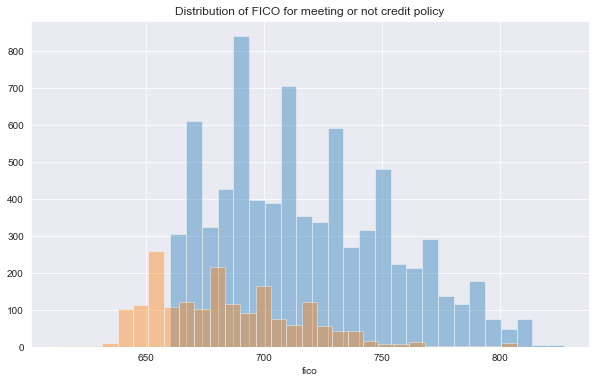

In [13]:
plt.figure(figsize=(10,6))
sns.distplot(df[df['credit.policy'] == 1 ]['fico'], kde=False, bins=30)
sns.distplot(df[df['credit.policy'] == 0 ]['fico'], kde=False, bins=30)
plt.title('Distribution of FICO for meeting or not credit policy')
plt.show()

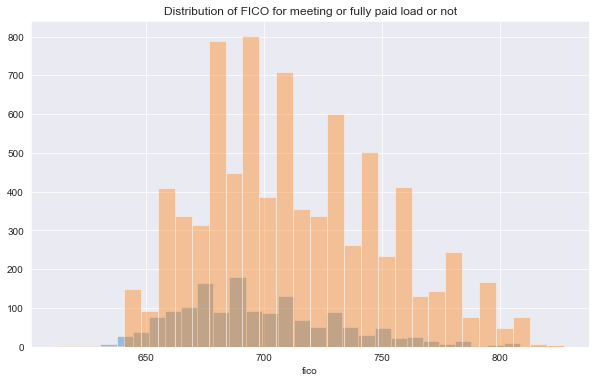

In [14]:
plt.figure(figsize=(10,6))
sns.distplot(df[df['not.fully.paid'] == 1 ]['fico'], kde=False, bins=30)
sns.distplot(df[df['not.fully.paid'] == 0 ]['fico'], kde=False, bins=30)
plt.title('Distribution of FICO for meeting or fully paid load or not')
plt.show()

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

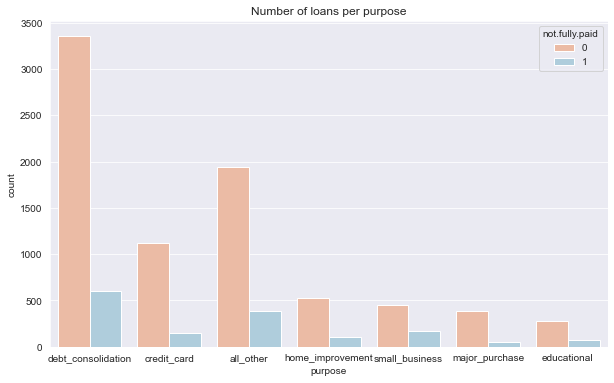

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose', data=df, hue='not.fully.paid', palette='RdBu')
plt.title('Number of loans per purpose')
plt.show()

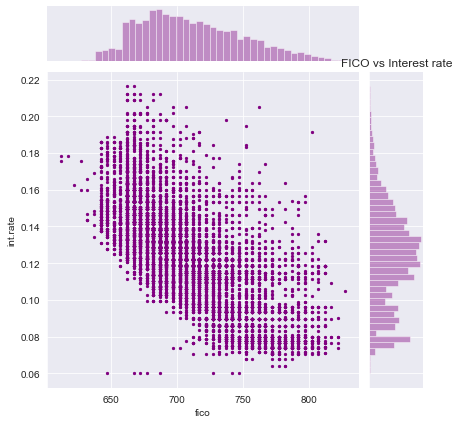

In [16]:
sns.jointplot(x='fico', y='int.rate', data=df, color='purple', s=5)
plt.title('FICO vs Interest rate')
plt.show()

c:\users\alexrpd\appdata\local\programs\python\python38\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


<Figure size 792x504 with 0 Axes>

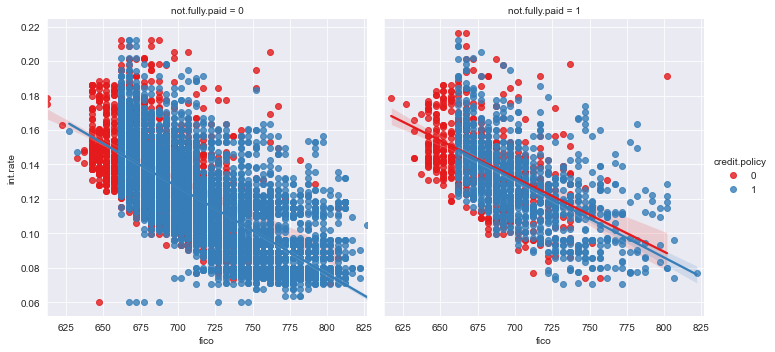

In [17]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',
           col='not.fully.paid',palette='Set1')
plt.show()

# Setting up the Data



In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features


In [19]:
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [20]:
cat_feats = ['purpose']

In [21]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [22]:
df_final = pd.get_dummies(df, columns=cat_feats, drop_first=True)

In [23]:
df_final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [24]:
X = df_final.drop('not.fully.paid',axis=1)
y = df_final['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Training a Decision Tree Model


In [25]:
tree = DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree

In [26]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
pred = tree.predict(X_test)

In [28]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      2408
           1       0.19      0.20      0.19       466

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.73      0.73      2874



## Training the Random Forest model


In [29]:
rfc = RandomForestClassifier(n_estimators=300, n_jobs=-1)

In [30]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, n_jobs=-1)

## Predictions and Evaluation


In [31]:
pred_rfc = rfc.predict(X_test)

In [32]:
print(metrics.classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.33      0.02      0.03       466

    accuracy                           0.84      2874
   macro avg       0.59      0.51      0.47      2874
weighted avg       0.76      0.84      0.77      2874



In [39]:
print(metrics.confusion_matrix(y_test,pred_rfc))

[[2392   16]
 [ 458    8]]


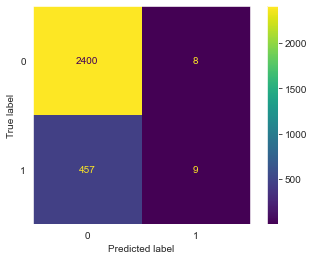

In [40]:
metrics.plot_confusion_matrix(rfc, X=X_test, y_true=y_test)
plt.grid(False)
plt.show()

In [34]:
error_rate = list()
for i in notebook.tqdm(range(1, 500, 10)):
    rfc = RandomForestClassifier(n_estimators=i, n_jobs=-1)
    rfc.fit(X_train, y_train)
    pred_i = rfc.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

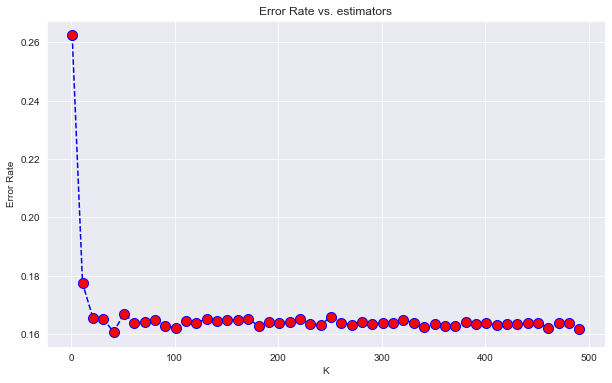

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,500, 10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. estimators')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()